In [1]:
import numpy as np
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt

## Moving Average Crossover

- Moving average is a tool in technical analysis which takes the average closing price over a specified window
- Different types of moving averages, e.g Simple Moving Average (SMA) which uses closing price or Exponential Moving Average (EMA) which uses adjusted closing price
- No definite better moving average, sometimes EMA is better than SMA and vice versa
- In general a good indicator for trend and NOT future prediction
- Here will demonstrate SMA Crossover where the crossover of short-term and long-term moving averages signal whether to go long or short
- Golden Cross (Buy Signal): point when short-term moving average intercepts above long-term moving average
- Death Cross (Sell Signal): point when long-term moving average intercepts above short-term moving average
- Drawbacks is that it's an indicator not a prediction so no guarantee and in volatile conditions may trigger signals that incur losses
- Possible to adjust moving average windows in volatile environment to reduce loss but not guaranteed
- Function below outputs Closing Prices of a stock with buy and sell signals using SMA Crossover
- Function can be customised to choose moving average windows and time period

In [63]:
def Moving_Average_Crossover(ticker,fast, slow, start_date, end_date):
    
    
    #Download data from Yahoo Finance 
    df = yf.download(ticker, start=start_date,end=end_date)
    
    #Set SMA, note shift() used since we're using closing price
    short_term = ' '.join([str(fast), 'SMA'])
    df[short_term] = df['Close'].rolling(fast).mean().shift()
    
    long_term = ' '.join([str(slow), 'SMA'])
    df[long_term] = df['Close'].rolling(slow).mean().shift()
    
    #Add a column to signal whether we're going long or short 
    df['Signal'] = np.where(df[short_term] > df[long_term], 1, -1)
    df['Signal'] = np.where(df[short_term] < df[long_term], -1, 1)
    df.dropna()
    
    #Signals a change/interecept between
    df['Indicator'] = df['Signal'].diff()
    
    #Plotting data: Closing Price and SMAs
    plt.figure(figsize = (20,16), dpi=200)
    df['Close'].plot()
    df[short_term].plot()
    df[long_term].plot(color = 'm')
    
    #Ploting markers
    plt.plot(df.index[df['Indicator'] == 2], df[df['Indicator'] == 2][short_term], color = 'g', linestyle = 'None',marker =  '^', markersize = 12)
    plt.plot(df.index[df['Indicator'] == -2], df[df['Indicator'] == -2][long_term], color = 'r', linestyle = 'None',marker = '^', markersize = 12)

    plt.legend()

    plt.ylabel('Close Price')
    plt.title('Close Price of AAPL')
    return df.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,10 SMA,30 SMA,Signal,Indicator
Date,,,,,,,,,,
2021-02-17,131.250000,132.220001,129.470001,130.839996,129.695969,97918500,135.508000,133.897334,1,0.0
2021-02-18,129.199997,130.000000,127.410004,129.710007,128.575851,96856700,135.092999,133.945000,1,0.0
2021-02-19,130.240005,130.710007,128.800003,129.869995,128.734436,87668800,134.670000,133.901667,1,0.0
2021-02-22,128.009995,129.720001,125.599998,126.000000,124.898293,103916400,133.917999,134.010667,-1,-2.0
2021-02-23,123.760002,126.709999,118.389999,125.860001,124.759514,158273000,132.842000,133.846667,-1,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.688000,165.362667,1,0.0
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,174.776001,166.444668,1,0.0
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,175.131000,167.421334,1,0.0


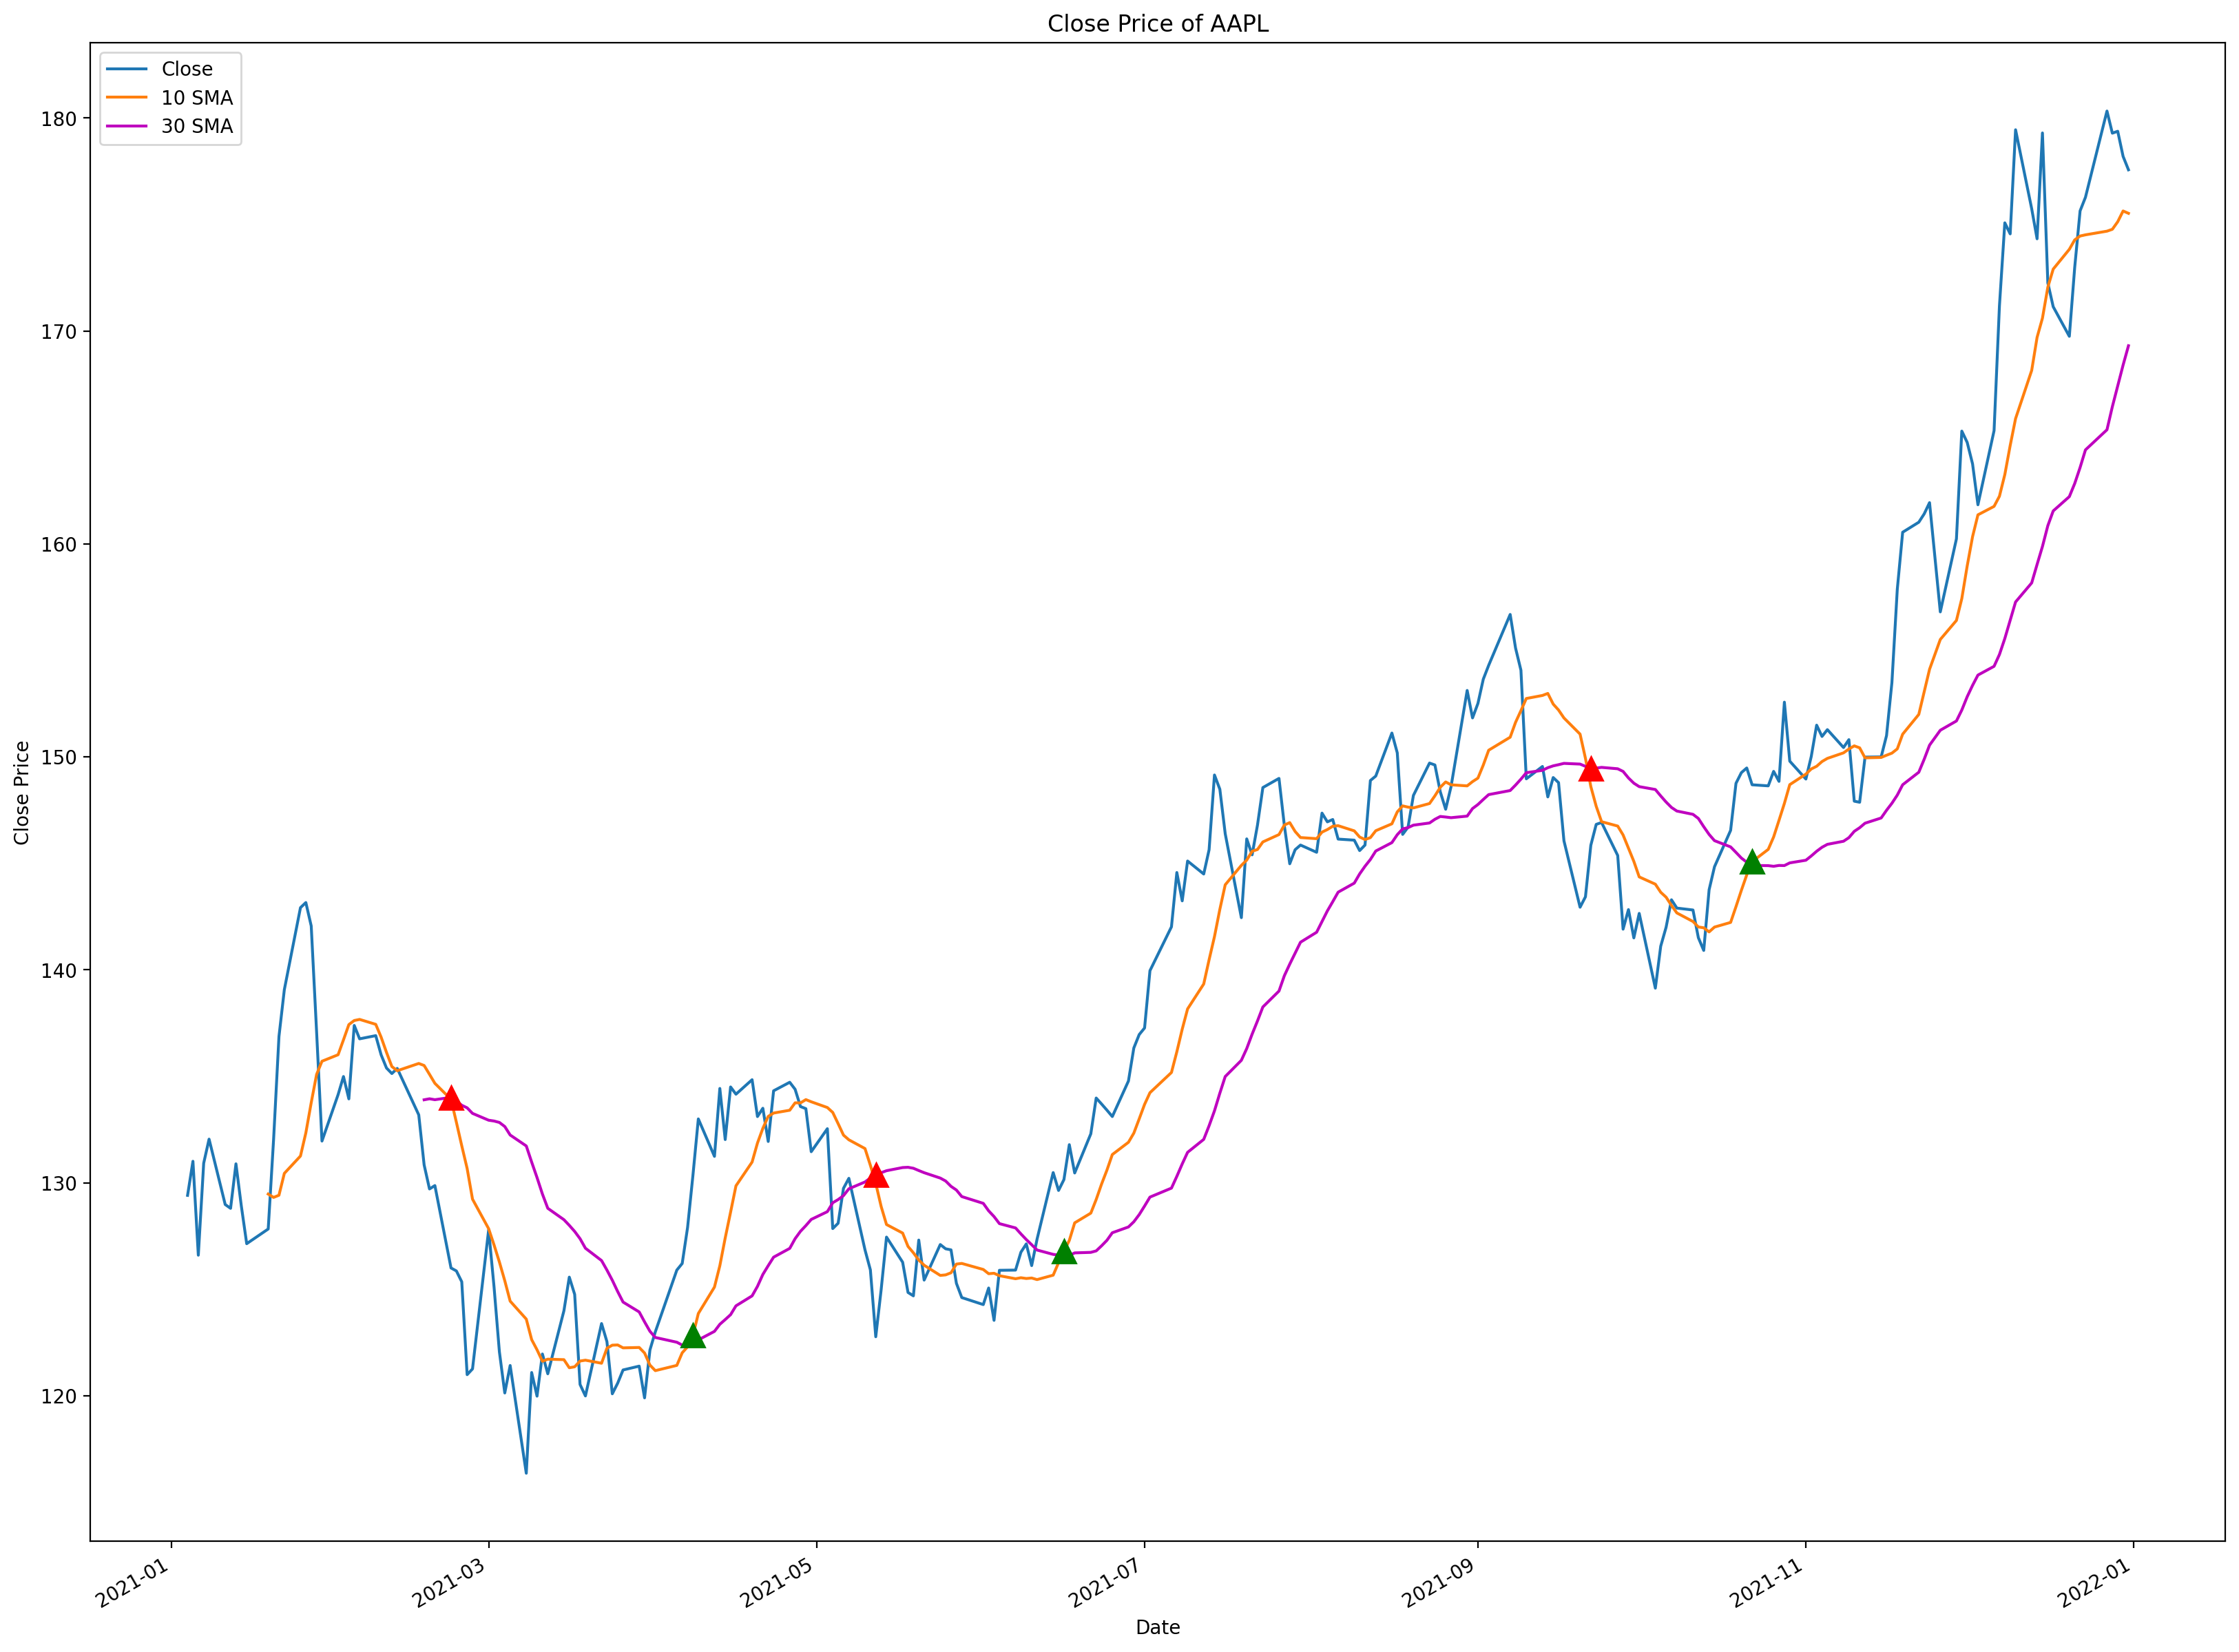

In [64]:
Moving_Average_Crossover('AAPL', 10, 30, '2021-1-1', '2022-1-1' )